# Part 3

In [2]:
# import modules & libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# importing prev dataset generated and Variables data

results = pd.read_csv('final_2.csv')
data_pob = pd.read_csv('./data/compiled_metrics.csv')
data_air = pd.read_csv('./data/quality_air_compiled.csv')
day_det = pd.read_csv('./data/day_inf_dectectec.csv')

results = results.set_index('location')

In [4]:
# Checking Datasets
results.head()


,L,k,a,R2,lat,lng,Population
location,,,,,,,
Ch-Hubei,67562.580571,0.235976,18.661716,0.991812,30.861038,30.861038,59020000.0
South Korea,7957.233018,0.364160,39.352108,0.998540,35.907757,127.766922,51635256.0
Italy,4362.750134,0.414286,40.282996,0.998386,41.871941,12.567380,60431283.0
Iran,25663.054068,0.472030,45.876146,0.999896,32.427910,53.688046,81800269.0
Ch-Guangdong,1338.801164,0.283629,11.662214,0.998553,22.993891,22.993891,113460000.0


In [5]:
data_pob.head()

,Region,location_adj,Male_population,Over_65,Foreign_turism,health_exp_usd
0,Beijing,Ch-Beijing,8781.0,1989.0,3400000.0,998.400000
1,Tianjin,Ch-Tianjin,6863.0,1397.0,560000.0,925.440221
2,Hebei,Ch-Hebei,31210.0,7854.0,750000.0,811.490834
3,Shanxi,Ch-Shanxi,15593.0,3147.0,470000.0,754.559227
4,Inner Mongolia,Ch-Inner Mongolia,10608.0,2047.0,1790000.0,709.260970


In [8]:
data_air.head()

,location,location_adj,COU,Country,MAREG,Macroregion,MIREG,Microregion,VAR,Variable,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Air_Pm2.5,Flag Codes,Flags
0,Australia,Australia,AUS,Australia,TOTAL,-Total-,TOTAL,-Total-,PWM_EX,Mean population exposure to PM2.5,...,2017,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,8.52437,NaN,NaN
1,Austria,Austria,AUT,Austria,TOTAL,-Total-,TOTAL,-Total-,PWM_EX,Mean population exposure to PM2.5,...,2017,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,12.68774,NaN,NaN
2,Belgium,Belgium,BEL,Belgium,TOTAL,-Total-,TOTAL,-Total-,PWM_EX,Mean population exposure to PM2.5,...,2017,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,13.09935,NaN,NaN
3,Canada,Canada,CAN,Canada,TOTAL,-Total-,TOTAL,-Total-,PWM_EX,Mean population exposure to PM2.5,...,2017,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,6.45931,NaN,NaN
4,Czech Republic,Czech Republic,CZE,Czech Republic,TOTAL,-Total-,TOTAL,-Total-,PWM_EX,Mean population exposure to PM2.5,...,2017,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,16.21481,NaN,NaN


In [12]:
day_det.head()

,location,Day_inf_detected
0,Ch-Hubei,1
1,South Korea,1
2,Italy,10
3,Iran,29
4,Ch-Guangdong,1


In [11]:
data_air2 = data_air[['location_adj','Air_Pm2.5']].set_index('location_adj')
data_pob2 = data_pob.drop('Region',axis=1).set_index('location_adj')
day_det2 = day_det.set_index('location')

In [14]:
res2 = results.join(data_air2)
res2

,L,k,a,R2,lat,lng,Population,Air_Pm2.5
location,,,,,,,,
Ch-Hubei,67562.580571,0.235976,18.661716,0.991812,30.861038,30.861038,59020000.0,59.254700
South Korea,7957.233018,0.364160,39.352108,0.998540,35.907757,127.766922,51635256.0,25.138890
Italy,4362.750134,0.414286,40.282996,0.998386,41.871941,12.567380,60431283.0,16.497100
Iran,25663.054068,0.472030,45.876146,0.999896,32.427910,53.688046,81800269.0,48.950000
Ch-Guangdong,1338.801164,0.283629,11.662214,0.998553,22.993891,22.993891,113460000.0,34.465890
Ch-Henan,1269.658397,0.283514,12.675766,0.998779,34.199126,34.199126,94000000.0,75.389510
Ch-Zhejiang,1189.507076,0.322481,10.410475,0.996106,29.298788,29.298788,57370000.0,44.766770
Ch-Hunan,1017.347178,0.285798,11.901178,0.998190,27.658509,27.658509,67370000.0,48.635940
Ch-Anhui,994.352156,0.280818,13.359942,0.999319,31.771152,31.771152,62000000.0,57.406660


In [15]:
res3 = res2.join(data_pob2)

In [16]:
res3

,L,k,a,R2,lat,lng,Population,Air_Pm2.5,Male_population,Over_65,Foreign_turism,health_exp_usd
location,,,,,,,,,,,,
Ch-Hubei,67562.580571,0.235976,18.661716,0.991812,30.861038,30.861038,59020000.0,59.254700,24973.0,6059.0,3070000.0,590.141205
South Korea,7957.233018,0.364160,39.352108,0.998540,35.907757,127.766922,51635256.0,25.138890,25860546.0,7445058.0,15347000.0,2711.738257
Italy,4362.750134,0.414286,40.282996,0.998386,41.871941,12.567380,60431283.0,16.497100,29383702.0,13749132.0,61567200.0,3427.306466
Iran,25663.054068,0.472030,45.876146,0.999896,32.427910,53.688046,81800269.0,48.950000,41358928.0,5058998.0,7295000.0,1563.751678
Ch-Guangdong,1338.801164,0.283629,11.662214,0.998553,22.993891,22.993891,113460000.0,34.465890,50209.0,7687.0,8620000.0,564.806353
Ch-Henan,1269.658397,0.283514,12.675766,0.998779,34.199126,34.199126,94000000.0,75.389510,39815.0,8698.0,1050000.0,604.848058
Ch-Zhejiang,1189.507076,0.322481,10.410475,0.996106,29.298788,29.298788,57370000.0,44.766770,24418.0,6108.0,3230000.0,641.529018
Ch-Hunan,1017.347178,0.285798,11.901178,0.998190,27.658509,27.658509,67370000.0,48.635940,28469.0,7057.0,1790000.0,584.367616
Ch-Anhui,994.352156,0.280818,13.359942,0.999319,31.771152,31.771152,62000000.0,57.406660,26667.0,6840.0,2190000.0,634.060694


In [36]:
res4 = res3.join(day_det2)
print(res4.shape)
res4

(38, 13)


,L,k,a,R2,lat,lng,Population,Air_Pm2.5,Male_population,Over_65,Foreign_turism,health_exp_usd,Day_inf_detected
location,,,,,,,,,,,,,
Ch-Hubei,67562.580571,0.235976,18.661716,0.991812,30.861038,30.861038,59020000.0,59.254700,24973.0,6059.0,3070000.0,590.141205,1
South Korea,7957.233018,0.364160,39.352108,0.998540,35.907757,127.766922,51635256.0,25.138890,25860546.0,7445058.0,15347000.0,2711.738257,1
Italy,4362.750134,0.414286,40.282996,0.998386,41.871941,12.567380,60431283.0,16.497100,29383702.0,13749132.0,61567200.0,3427.306466,10
Iran,25663.054068,0.472030,45.876146,0.999896,32.427910,53.688046,81800269.0,48.950000,41358928.0,5058998.0,7295000.0,1563.751678,29
Ch-Guangdong,1338.801164,0.283629,11.662214,0.998553,22.993891,22.993891,113460000.0,34.465890,50209.0,7687.0,8620000.0,564.806353,1
Ch-Henan,1269.658397,0.283514,12.675766,0.998779,34.199126,34.199126,94000000.0,75.389510,39815.0,8698.0,1050000.0,604.848058,1
Ch-Zhejiang,1189.507076,0.322481,10.410475,0.996106,29.298788,29.298788,57370000.0,44.766770,24418.0,6108.0,3230000.0,641.529018,1
Ch-Hunan,1017.347178,0.285798,11.901178,0.998190,27.658509,27.658509,67370000.0,48.635940,28469.0,7057.0,1790000.0,584.367616,1
Ch-Anhui,994.352156,0.280818,13.359942,0.999319,31.771152,31.771152,62000000.0,57.406660,26667.0,6840.0,2190000.0,634.060694,1


In [38]:
mex_row = res4.loc['Mexico']

y_L = res4['L'].drop('Mexico')
y_k = res4['k'].drop('Mexico')
y_a = res4['a'].drop('Mexico')

x = res4[['Population','Air_Pm2.5','Male_population','Over_65','Foreign_turism','health_exp_usd','Day_inf_detected']]

In [39]:
mex_row

L                   5.684350e+00
k                   1.000000e+00
a                   3.778361e+01
R2                  9.667281e-01
lat                 2.363450e+01
lng                -1.025528e+02
Population          1.261908e+08
Air_Pm2.5           2.123615e+01
Male_population     6.172082e+07
Over_65             9.115625e+06
Foreign_turism      4.131300e+07
health_exp_usd      9.718232e+02
Day_inf_detected    3.800000e+01
Name: Mexico, dtype: float64

# Splitting Data

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)

mex_test = x_norm[37]
x_data = x_norm[:37]

In [54]:
print(y_L.shape)
print(y_k.shape)
print(y_a.shape)

print(x_data.shape)
print(mex_test.shape)

# Shapes OK!

(37,)
(37,)
(37,)
(37, 7)
(7,)


In [87]:
from sklearn.model_selection import train_test_split

# Splitting for L
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(x_data, y_L, test_size=0.1)

# Splitting for k
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(x_data, y_k, test_size=0.1)

# Splitting for a
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(x_data, y_a, test_size=0.1)


In [88]:
#pd.DataFrame(x_norm)

# Creating models to predict L, k, a

In [89]:
# Models to Try:
# - RandomForest
# - LinearRegression
# - Lasso
# - ElasticNet
# - RidgeRegression
# - SVR
# - EnsembleRegressors

from sklearn.metrics import r2_score    #r2_score(y_true, y_pred)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


In [90]:
y_test_L.values

array([1269.65839739,  293.88031216,  109.71474407,   75.70077152])

## Modelling for L

In [112]:
# Linear Regression
mod_L_linear = LinearRegression()
mod_L_linear.fit(X_train_L, y_train_L)
print(mod_L_linear.score(X_train_L, y_train_L))
y_pred_L = mod_L_linear.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.6455023328164168
-49.62111737371506


In [133]:
# Random Forest
mod_L_ranfor = RandomForestRegressor()
mod_L_ranfor.fit(X_train_L, y_train_L)
print(mod_L_ranfor.score(X_train_L, y_train_L))
y_pred_L = mod_L_ranfor.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.8194691595037364
-3.4909383183006586


In [122]:
# Lasso
mod_L_lasso = Lasso()
mod_L_lasso.fit(X_train_L, y_train_L)
print(mod_L_lasso.score(X_train_L, y_train_L))
y_pred_L = mod_L_lasso.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.6454912838363733
-49.38388206088427


In [132]:
# ElasticNet
mod_L_elNet = ElasticNet()
mod_L_elNet.fit(X_train_L, y_train_L)
print(mod_L_elNet.score(X_train_L, y_train_L))
y_pred_L = mod_L_elNet.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.19967678973566338
-98.44674595469526


In [127]:
#RidgeRegression
mod_L_ridge = Ridge()
mod_L_ridge.fit(X_train_L, y_train_L)
print(mod_L_ridge.score(X_train_L, y_train_L))
y_pred_L = mod_L_ridge.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.5007062906603423
-44.6055590297051


In [128]:
#SVR
mod_L_SVR = SVR()
mod_L_SVR.fit(X_train_L, y_train_L)
print(mod_L_SVR.score(X_train_L, y_train_L))
y_pred_L = mod_L_SVR.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

-0.09446698691556876
-0.0028106834415468906


In [134]:
y_pred_L

array([2970.93629708,  260.1099927 , 1277.32115197,  194.60257788])

In [135]:
y_test_L.values

array([1269.65839739,  293.88031216,  109.71474407,   75.70077152])

## Modelling for k

In [137]:
# Linear Regression
mod_k_linear = LinearRegression()
mod_k_linear.fit(X_train_k, y_train_k)
print(mod_k_linear.score(X_train_k, y_train_k))
y_pred_k = mod_k_linear.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.6867345277510359
-1.1058431672476026


In [143]:
# Random Forest
mod_k_ranfor = RandomForestRegressor()
mod_k_ranfor.fit(X_train_k, y_train_k)
print(mod_k_ranfor.score(X_train_k, y_train_k))
y_pred_k = mod_k_ranfor.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.907272078733522
-1.932983424357536


In [140]:
# Lasso
mod_k_lasso = Lasso()
mod_k_lasso.fit(X_train_k, y_train_k)
print(mod_k_lasso.score(X_train_k, y_train_k))
y_pred_k = mod_k_lasso.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.0
-0.17228020958127543


In [141]:
#SVR
mod_k_SVR = SVR()
mod_k_SVR.fit(X_train_k, y_train_k)
print(mod_k_SVR.score(X_train_k, y_train_k))
y_pred_k = mod_k_SVR.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.6153360479615315
-0.2092254101592348


In [144]:
y_pred_k

array([0.23500718, 0.22733958, 0.18164575, 0.27516002])

In [145]:
y_test_k.values

array([0.28351353, 0.20702082, 0.36416028, 0.29809105])

 ## Modelling for a

In [150]:
# Linear Regression
mod_a_linear = LinearRegression()
mod_a_linear.fit(X_train_a, y_train_a)
print(mod_a_linear.score(X_train_a, y_train_a))
y_pred_a = mod_a_linear.predict(X_test_k)
print(r2_score(y_test_a.values, y_pred_a))

0.9750632026976513
-18.022046289387166


In [154]:
# Random Forest
mod_a_ranfor = RandomForestRegressor()
mod_a_ranfor.fit(X_train_a, y_train_a)
print(mod_a_ranfor.score(X_train_a, y_train_a))
y_pred_a = mod_a_ranfor.predict(X_test_a)
print(r2_score(y_test_a.values, y_pred_a))

0.9348879687956825
-0.5083571299006815


In [148]:
# Lasso
mod_a_lasso = Lasso()
mod_a_lasso.fit(X_train_a, y_train_a)
print(mod_a_lasso.score(X_train_a, y_train_a))
y_pred_a = mod_a_lasso.predict(X_test_a)
print(r2_score(y_test_a.values, y_pred_a))

0.8503944009801576
-0.1717264857023908


In [149]:
#SVR
mod_a_SVR = SVR()
mod_a_SVR.fit(X_train_a, y_train_a)
print(mod_a_SVR.score(X_train_a, y_train_a))
y_pred_a = mod_a_SVR.predict(X_test_a)
print(r2_score(y_test_a.values, y_pred_a))

0.06909467014777515
-0.41458073036363996


In [155]:
y_pred_a

array([14.47681303, 15.79297708, 12.34465149, 14.81859399])

In [156]:
y_test_a.values

array([17.76440491, 12.64041418, 13.5725264 , 13.54319523])

# Getting Values for Mexico

In [159]:
mex_test

array([0.37493415, 0.1837536 , 0.38125883, 0.17624997, 0.49893042,
       0.07501468, 1.        ])

In [176]:
mex_pred_L = mod_L_ranfor.predict([mex_test])/10
mex_pred_k = mod_k_ranfor.predict([mex_test])
mex_pred_a = mod_a_linear.predict([mex_test])
print(mex_pred_L)
print(mex_pred_k)
print(mex_pred_a)

[1619.25936547]
[0.42408913]
[62.67920698]


In [177]:
def func(x, L, k, a):
    return L/(1 + np.exp(-k*(x-a)))

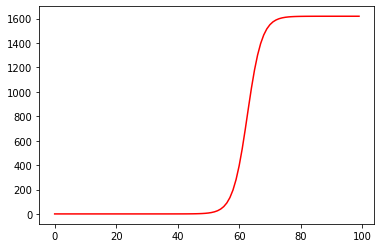

In [178]:
x2 = np.arange(100)
plt.plot(x2, func(x2, mex_pred_L, mex_pred_k, mex_pred_a), 'r-')
